Using image data to classify medium of artwork

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import os

import seaborn as sns
sns.set(style="darkgrid")
from sklearn import preprocessing


In [22]:
# Link to data on MoMA github
mydata_csv_url = 'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'

In [24]:
# load the data from local host
df = pd.read_csv('../data/artworks.csv')

# remove NAs from medium column
df = df.dropna(subset=['Medium', "ThumbnailURL"])

In [25]:
# Create target column
lith_condition = df['Medium'].str.lower().str.contains('lithograph')
df['Target'] = lith_condition

In [30]:
df = df[['ObjectID', 'ThumbnailURL', 'Target']]
df.head()

,ObjectID,ThumbnailURL,Target
0,2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,False
1,3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,False
2,4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,False
3,5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,False
4,6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,False


#### 100 images, 50 images of lithographs and 50 images of non lithographs (any other medium) were downloaded using the data_loader notebook. The title of each image is its Object ID and .jpg

In [32]:
#Uploading the images from local path

In [37]:
image_dir = os.path.join('../data/images')
image_dir

'../data/images'

In [41]:
image_names = os.listdir(image_dir)
print(image_names[:10])

['406.jpg', '4808.jpg', '4821.jpg', '4809.jpg', '413.jpg', '4799.jpg', '48.jpg', '798.jpg', '4822.jpg', '438.jpg']


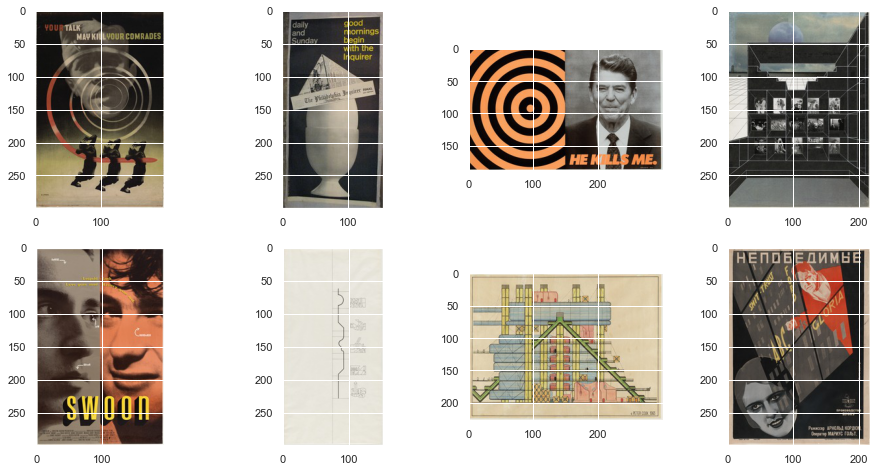

In [64]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

rows = 2
cols = 4

fig = plt.gcf()

pic_index = 1
pic_index += 8
next_image = [os.path.join(image_dir, fname) 
                for fname in image_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(rows, cols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [17]:
# 21251 entries, specific mediums, for example
df_artworks["Medium"].value_counts(dropna=False)

Gelatin silver print                                                                                                                             16215
NaN                                                                                                                                               9701
Lithograph                                                                                                                                        7815
Albumen silver print                                                                                                                              4874
Pencil on paper                                                                                                                                   1794
                                                                                                                                                 ...  
Lithograph with collage from an illustrated book with 121 lithographs, including covers (one w

In [18]:
if "Oil on canvas" in df_artworks["Medium"].values:
    print('Element exists in Dataframe')

Element exists in Dataframe


In [11]:
# Looking at the column headings in dataset
display(list(df_artworks.columns.values))

['Title',
 'Artist',
 'ConstituentID',
 'ArtistBio',
 'Nationality',
 'BeginDate',
 'EndDate',
 'Gender',
 'Date',
 'Medium',
 'Dimensions',
 'CreditLine',
 'AccessionNumber',
 'Classification',
 'Department',
 'DateAcquired',
 'Cataloged',
 'ObjectID',
 'URL',
 'ThumbnailURL',
 'Circumference (cm)',
 'Depth (cm)',
 'Diameter (cm)',
 'Height (cm)',
 'Length (cm)',
 'Weight (kg)',
 'Width (cm)',
 'Seat Height (cm)',
 'Duration (sec.)']

We don't need all of these columns to be included in the features that the model will learn to predict from. Some are unnecessary or redundent. They could be included but I predict would be useless or arbitrary to the work of art itself, such as "Object ID" which is hyper specific to the institution, rather than to any atribute of the work of art itself. I took away all columns that correspond to MOMA specific data, hyperspecific descriptive data, gender, and URLs.

Next I need to decide between Classification and Department, which will become my y axis, or, that which will be predicted. Since they are very similar, only one can remain, otherwise I imagine it would be too strong of a feature, because all repeating classifications would end up within the same department.

Classification is more specific to the object, while Department is more useful to the institution. To make this project more generalized, and to remain consistant with removing data specific to MOMA, I decided to keep Classification and remove Department.

In [12]:
df_art_edited = df_artworks.drop(columns=['ConstituentID',
                            'BeginDate',
                            'EndDate',
                            'Gender', 
                            'CreditLine', 
                            'AccessionNumber',
                            'Department',
                            'DateAcquired',
                            'Cataloged',
                            'ObjectID', 
                            'URL',
                            'ThumbnailURL', 
                            'Circumference (cm)',
                            'Depth (cm)',
                            'Diameter (cm)',
                            'Height (cm)',
                            'Length (cm)',
                            'Weight (kg)',
                            'Width (cm)',
                            'Seat Height (cm)',
                            'Duration (sec.)'])

In [13]:
df_art_edited

,Title,Artist,ArtistBio,Nationality,Date,Medium,Dimensions,Classification
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,"(Austrian, 1841–1918)",(Austrian),1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",Architecture
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,"(French, born 1944)",(French),1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",Architecture
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",Architecture
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,"(French and Swiss, born Switzerland 1944)",(),1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",Architecture
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,"(Austrian, 1876–1957)",(Austrian),1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",Architecture
...,...,...,...,...,...,...,...,...
138146,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","(American, 1861–1934) (American, 1860–1933)",() (American) (American),c. 1890,Gelatin silver print,"4 1/4 × 6 1/2"" (10.8 × 16.5 cm)",Photograph
138147,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",Illustrated Book
138148,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 5 5/16 × 3 15/16"" (13.5 × 10 cm);...",Illustrated Book
138149,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,"(Swiss, 1889–1943)",(Swiss),1939,One from an illustrated book with four line bl...,"composition: 4 5/16 × 3 15/16"" (11 × 10 cm); p...",Illustrated Book


#### Preprocessing

In [14]:
df_art_edited.dtypes

Title             object
Artist            object
ArtistBio         object
Nationality       object
Date              object
Medium            object
Dimensions        object
Classification    object
dtype: object

In [15]:
# Changing the values to numeric values using label encoding 

In [16]:
df_art_edited['Title'] = df_art_edited['Title'].astype(str).str.replace('/',' ')

In [17]:
df_art_edited["Title"].astype("str")

0         Ferdinandsbrücke Project, Vienna, Austria (Ele...
1         City of Music, National Superior Conservatory ...
2         Villa near Vienna Project, Outside Vienna, Aus...
3         The Manhattan Transcripts Project, New York, N...
4         Villa, project, outside Vienna, Austria, Exter...
                                ...                        
138146                                             Untitled
138147    Plate (folio 2 verso) from Muscheln und schirm...
138148    Plate (folio 6) from Muscheln und schirme (She...
138149    Plate (folio 12) from Muscheln und schirme (Sh...
138150    Plate (folio 16) from Muscheln und schirme (Sh...
Name: Title, Length: 138151, dtype: object

In [18]:
df_art_edited.dtypes

Title             object
Artist            object
ArtistBio         object
Nationality       object
Date              object
Medium            object
Dimensions        object
Classification    object
dtype: object

In [45]:
# Bag of words model?

from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
vectorizer = CountVectorizer(max_features=1500, min_df=1, max_df=.2, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df_art_edited).toarray()

In [49]:
X

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [57]:
X

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

In [59]:
df_art_edited["Title"].encode

AttributeError: 'Series' object has no attribute 'encode'

In [47]:
for c in df_art_edited.columns:
    if df_art_edited[c].dtype == object:
        df_art_edited[c] = df_art_edited[c].astype(str)

In [48]:
df_art_edited.dtypes

Title             object
Artist            object
ArtistBio         object
Nationality       object
Date              object
Medium            object
Dimensions        object
Classification    object
dtype: object

In [60]:
from numpy import array
from numpy import argmax
import keras
from keras.utils import to_categorical
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = array(df_art_edited)
data

array([['Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)',
        'Otto Wagner', '(Austrian, 1841–1918)', ...,
        'Ink and cut-and-pasted painted pages on paper',
        '19 1/8 x 66 1/2" (48.6 x 168.9 cm)', 'Architecture'],
       ['City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard',
        'Christian de Portzamparc', '(French, born 1944)', ...,
        'Paint and colored pencil on print',
        '16 x 11 3/4" (40.6 x 29.8 cm)', 'Architecture'],
       ['Villa near Vienna Project, Outside Vienna, Austria, Elevation',
        'Emil Hoppe', '(Austrian, 1876–1957)', ...,
        'Graphite, pen, color pencil, ink, and gouache on tracing paper',
        '13 1/2 x 12 1/2" (34.3 x 31.8 cm)', 'Architecture'],
       ...,
       ['Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas)',
        'Sophie Taeuber-Arp', '(Swiss, 1889–1943)', ...,
        'One from an illustrated book with four

In [26]:
encoded = to_categorical(df_art_edited)
encoded

ValueError: invalid literal for int() with base 10: 'Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)'

In [73]:
encode = preprocessing.LabelEncoder()

#extracting data types for each column and performing numeric transformation
for i in df_art_edited:
    if df_art_edited[i].dtypes =='object':
        df_art_edited[i]=encode.fit_transform(df_art_edited[i])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [8]:
df_artworks.ThumbnailURL[0]

'http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167'

In [9]:
df_artworks.ThumbnailURL[1]

'http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a'